<a href="https://colab.research.google.com/github/Thecodedgirl/Mahamudat_portfolio/blob/main/housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Model Prediction**

This project aims to predict house prices in Miami using machine learning models. The first step involves analyzing the dataset and identifying correlations between different features such as the number of bedrooms, bathrooms, and square footage. Then, a linear regression model, random forest, and Support Vector Regression (SVR) models are trained using this data to predict the house prices. The performance of each model is evaluated using various metrics such as mean squared error and R-squared. Ultimately, this project provides a useful tool for predicting house prices in Miami, which can be used by real estate professionals and potential buyers/sellers to make informed decisions.


In [1]:
#importing the neccessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.svm import SVR


In [2]:
#reading the miami_estate.csv file which is the dataset
housing = pd.read_csv("/content/sample_data/miami-housing.csv")

In [11]:
#to check dataset features/ columns 
housing.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [ ]:
#to check for null values in the dataset 
housing.isnull().sum()

Aheat map is plotted to check the correllation between the variables/features and the predicted variable which is the house price. Also scatter plots of some of these features are plotted to further determine their correllation. From the heat map below, it can be observed that the 'LATITUDE' has a corellation coefficient of -0.048 which is very insignificant hence the dropping of the column. Also, other features like 'RAIL_DIST','PARCELNO', 'avno60plus', 'month_sold' were also dropped as they have very low correllation coeeficient when compared to the other variables.

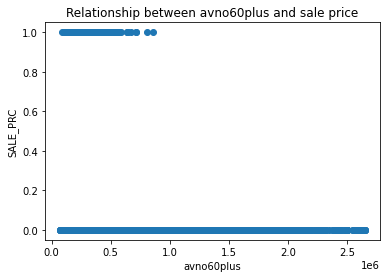

In [6]:
#relationship between avno60plus and sale price
plt.scatter(housing.SALE_PRC , housing.avno60plus)
plt.xlabel("avno60plus")
plt.ylabel("SALE_PRC")
plt.title("Relationship between avno60plus and sale price")
plt.show()

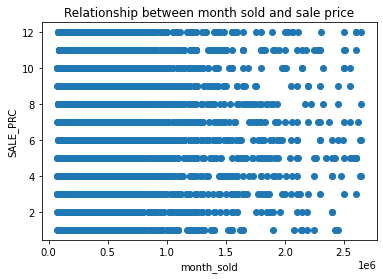

In [7]:
#relationship between month sold and sale price
plt.scatter(housing.SALE_PRC , housing.month_sold)
plt.xlabel("month_sold")
plt.ylabel("SALE_PRC")
plt.title("Relationship between month sold and sale price")
plt.show()

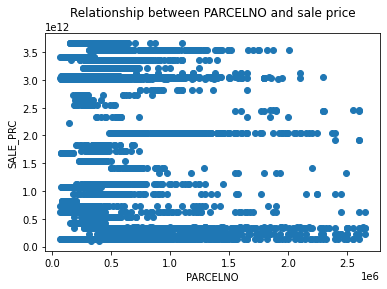

In [8]:
#relationship between PARCELNO and sale price
plt.scatter(housing.SALE_PRC , housing.PARCELNO)
plt.xlabel("PARCELNO")
plt.ylabel("SALE_PRC")
plt.title("Relationship between PARCELNO and sale price")
plt.show()

<Axes: >

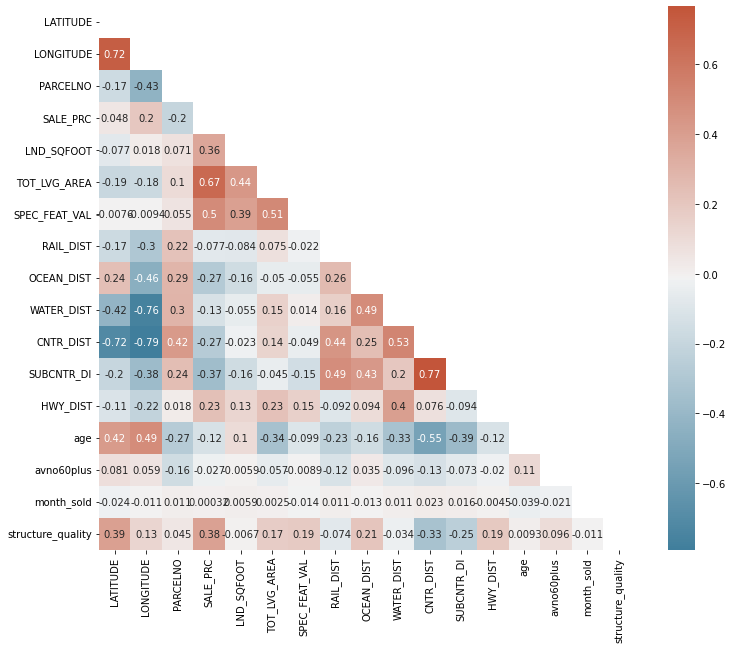

In [9]:
#To check for correllation between the other features and the house price using the heat map 
corr = housing.corr()
ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [12]:
#dropping irrelevant variables with insignifican correlation with the house price 
df_housing=housing.drop(labels=['LATITUDE','RAIL_DIST','PARCELNO', 'avno60plus', 'month_sold'],axis = 1)


In [ ]:
#filling missing values with the mean value of the variable
df_housing = df_housing.mask(df_housing == 0).fillna (df_housing.mean())
df_housing.describe()


In [13]:
#declaring the dependent variable y(SALE_PRC) and the independent variable x(other variables)
x = df_housing.drop('SALE_PRC' , axis=1)
y = df_housing.SALE_PRC

In [14]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)


In [15]:
#using linear regression(LR) to build the model 1
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)
LinearRegression()
#prediction of y(sales price) using the LR model
y_predict=model.predict(x_test)
df_y = pd.DataFrame(y_predict)
#calculating errors in the LR model
from sklearn import metrics
import numpy as np
mse_LINEAR=  metrics.mean_squared_error(y_test, y_predict)
mae_LINEAR = metrics.mean_absolute_error(y_test, y_predict)
rmse_LINEAR = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print ('Mean Squared Error: ', mse_LINEAR)
print ('Mean Absolute Error: ', mae_LINEAR)
print ('Root Mean Squared Error: ', rmse_LINEAR)


Mean Squared Error:  35342179575.96768
Mean Absolute Error:  116222.95782961058
Root Mean Squared Error:  187995.15838437882


In [16]:
#using support vector regression (SVR) to build model 2 via poly kernel
from sklearn.svm import SVR
model = SVR(kernel = 'poly')
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
from sklearn import metrics
import numpy as np
mse_SVRpoly =  metrics.mean_squared_error(y_test, y_predict)
mae_SVRpoly = metrics.mean_absolute_error(y_test, y_predict)
rmse_SVRpoly = np.sqrt(metrics.mean_squared_error(y_test, y_predict))                                         
print ('Mean Squared Error: ', mse_SVRpoly)
print ('Mean Absolute Error: ', mae_SVRpoly)
print ('Root Mean Squared Error: ', rmse_SVRpoly)

Mean Squared Error:  116830157263.42628
Mean Absolute Error:  177884.62645337573
Root Mean Squared Error:  341804.26747398323


In [17]:
#using support vector regression (SVR) to build model 2 via rbf kernel
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
from sklearn import metrics
import numpy as np
mse_SVRrbf =  metrics.mean_squared_error(y_test, y_predict)
mae_SVRrbf = metrics.mean_absolute_error(y_test, y_predict)
rmse_SVRrbf = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print ('Mean Squared Error: ', mse_SVRrbf)
print ('Mean Absolute Error: ', mae_SVRrbf)
print ('Root Mean Squared Error: ', rmse_SVRrbf)


Mean Squared Error:  118451284500.288
Mean Absolute Error:  179562.96703690302
Root Mean Squared Error:  344167.5238895849


The SVR model for poly will be selected as the comparism model with the other ML models as it has the lower mean absolute error. 


In [18]:
#building model 3 using Random forest with n_estimators= 100
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
mse_RFR100 = metrics.mean_squared_error (y_test, y_predict)
mae_RFR100 = metrics.mean_absolute_error(y_test, y_predict)
rmse_RFR100 = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print ('Mean Squared Error: ', mse_RFR100)
print ('Mean Absolute Error: ', mae_RFR100)
print ('Root Mean Squared Error: ', rmse_RFR100)



Mean Squared Error:  10574606383.409418
Mean Absolute Error:  47159.97174831038
Root Mean Squared Error:  102832.90515885185


In [19]:
#building model 3 using Random forest with n_estimators= 200
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200)
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
mse_RFR200 = metrics.mean_squared_error (y_test, y_predict)
mae_RFR200 = metrics.mean_absolute_error(y_test, y_predict)
rmse_RFR200 = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print ('Mean Squared Error: ', mse_RFR200)
print ('Mean Absolute Error: ', mae_RFR200)
print ('Root Mean Squared Error: ', rmse_RFR200)



Mean Squared Error:  10460146631.407673
Mean Absolute Error:  46995.42033366032
Root Mean Squared Error:  102274.85825660026


In [20]:
#building model 3 using Random forest with n_estimators= 500
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
mse_RFR500 = metrics.mean_squared_error (y_test, y_predict)
mae_RFR500 = metrics.mean_absolute_error(y_test, y_predict)
rmse_RFR500 = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print ('Mean Squared Error: ', mse_RFR500)
print ('Mean Absolute Error: ', mae_RFR500)
print ('Root Mean Squared Error: ', rmse_RFR500)


Mean Squared Error:  10457151039.215134
Mean Absolute Error:  46927.881581404
Root Mean Squared Error:  102260.21239570713


In [21]:
#to calculate the average of the errors for Random Forest
import statistics
mse_RF = statistics.mean([mse_RFR100, mse_RFR200, mse_RFR500])
mae_RF = statistics.mean([mae_RFR100, mae_RFR200, mae_RFR500])
rmse_RF = statistics.mean([rmse_RFR100,rmse_RFR200, rmse_RFR500])
print (' Average Mean Squared Error for Random Forest: ', mse_RF)
print (' Average Mean Absolute Error for Random Forest: ', mae_RF)
print (' Average  Root Mean Squared Error for Random Forest: ', rmse_RF)


 Average Mean Squared Error for Random Forest:  10497301351.344074
 Average Mean Absolute Error for Random Forest:  47027.757887791566
 Average  Root Mean Squared Error for Random Forest:  102455.99193705308


From the Mean Absolute Error plot below, it can be seen that the random forest has the least error which makes it a more efficient model for the house price prediction.

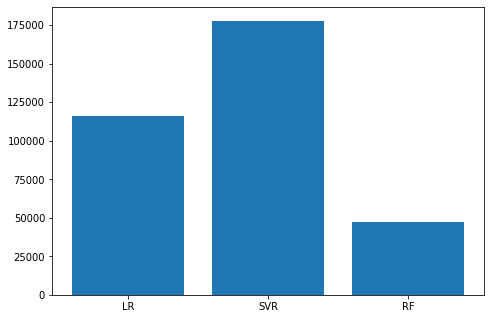

In [22]:
#to compare the error values of the three models
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['LR', 'SVR', 'RF']
mean_Absolute_Error = [mae_LINEAR,mae_SVRpoly,mae_RF]
ax.bar(models,mean_Absolute_Error )
plt.show()